# Notebook for CRN2

This notebook can be used to generate data on the birth-death chemical reaction : $ø \xrightleftharpoons[\gamma]{k_r} S$.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import seaborn
import pandas as pd
from scipy.stats import poisson
import math
import ode
from typing import Tuple, Callable
from CRN2_birth_death import propensities_birth_death as propensities

## Import data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'birth_death'
NUM_PARAMS = 2

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Neural Network created.


Training ...:  62%|██████▏   | 311/500 [00:55<00:33,  5.57it/s]


Learning rate: 0.0003125,
Train loss: 19.20571517944336,
 Valid loss: 19.253864288330078
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:31<00:00,  5.43it/s]


Learning rate: 0.00125,
Train loss: 0.000980385229922831,
 Valid loss: 0.0009816293604671955
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:30<00:00,  5.54it/s]


Learning rate: 0.00125,
Train loss: 0.0010241138515993953,
 Valid loss: 0.001013279310427606
Computed loss with 1 components - average loss = 0.2558815559993188.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:47<00:00,  4.64it/s]


Learning rate: 0.00125,
Train loss: 0.0009539181482978165,
 Valid loss: 0.000972759211435914
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:47<00:00,  4.66it/s]


Learning rate: 0.00125,
Train loss: 0.0009422718430869281,
 Valid loss: 0.000946366460993886
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:47<00:00,  4.63it/s]


Learning rate: 0.00125,
Train loss: 0.001105061499401927,
 Valid loss: 0.0011338579934090376
Computed loss with 2 components - average loss = 0.015092213948567709.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:04<00:00,  4.01it/s]


Learning rate: 0.00125,
Train loss: 0.0009786355076357722,
 Valid loss: 0.0009768180316314101
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:11<00:00,  3.78it/s]


Learning rate: 0.0025,
Train loss: 0.001012133783660829,
 Valid loss: 0.0010061342036351562
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:08<00:00,  3.88it/s]


Learning rate: 0.00125,
Train loss: 0.0010378282750025392,
 Valid loss: 0.0010327418567612767
Computed loss with 3 components - average loss = 0.01512375163535277.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:23<00:00,  3.48it/s]


Learning rate: 0.0025,
Train loss: 0.0010056492174044251,
 Valid loss: 0.000996764050796628
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:22<00:00,  3.49it/s]


Learning rate: 0.0025,
Train loss: 0.0010646641021594405,
 Valid loss: 0.0010595953790470958
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:24<00:00,  3.45it/s]


Learning rate: 0.00125,
Train loss: 0.0010119532234966755,
 Valid loss: 0.001020663883537054
Computed loss with 4 components - average loss = 0.015195227228105068.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:37<00:00,  3.18it/s]


Learning rate: 0.00125,
Train loss: 0.0009472438250668347,
 Valid loss: 0.0009445246541872621
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:36<00:00,  3.19it/s]


Learning rate: 0.000625,
Train loss: 0.0008925260626710951,
 Valid loss: 0.0008871062309481204
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:37<00:00,  3.17it/s]


Learning rate: 0.000625,
Train loss: 0.0008979096892289817,
 Valid loss: 0.0008887238800525665
Computed loss with 5 components - average loss = 0.01449523400515318.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:50<00:00,  2.92it/s]


Learning rate: 0.00125,
Train loss: 0.0009899387368932366,
 Valid loss: 0.0009703199029900134
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:52<00:00,  2.90it/s]


Learning rate: 0.0025,
Train loss: 0.0010575170163065195,
 Valid loss: 0.0010446145897731185
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:55<00:00,  2.85it/s]


Learning rate: 0.0025,
Train loss: 0.0011043755803257227,
 Valid loss: 0.001090038102120161
Computed loss with 6 components - average loss = 0.015308757002154985.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:12<00:00,  2.60it/s]


Learning rate: 0.00125,
Train loss: 0.0009776372462511063,
 Valid loss: 0.0009772536577656865
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:15<00:00,  2.55it/s]


Learning rate: 0.00125,
Train loss: 0.0011055542854592204,
 Valid loss: 0.0010717869736254215
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:17<00:00,  2.53it/s]


Learning rate: 0.0025,
Train loss: 0.0011286443332210183,
 Valid loss: 0.0011200931621715426
Computed loss with 7 components - average loss = 0.015341632378598055.


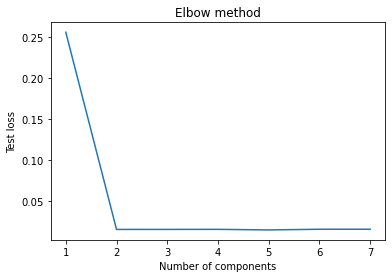

In [4]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64, print_results=False)
        loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Test loss')
plt.title('Elbow method')
plt.show()

In [4]:
N_COMPS = 3

## Training models

We train 3 different models to compare their accuracy.

In [5]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.
Neural Network created.
Neural Network created.


In [6]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...: 100%|█████████▉| 499/500 [02:06<00:00,  3.96it/s]


Learning rate: 0.00125,
Train loss: 0.001085506402887404,
 Valid loss: 0.0010816282592713833


Training ...: 100%|█████████▉| 499/500 [02:05<00:00,  3.99it/s]


Learning rate: 0.0025,
Train loss: 0.0009745540446601808,
 Valid loss: 0.0010013116989284754


Training ...: 100%|█████████▉| 499/500 [02:00<00:00,  4.13it/s]

Learning rate: 0.00125,
Train loss: 0.0009617448667995632,
 Valid loss: 0.0009369310573674738


In [9]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.0009858256671577692
Hellinger : 0.014760095626115799

Validation dataset
KLD : 0.001008716644719243
Hellinger : 0.01492587011307478

Test dataset
KLD : 0.001004007994197309
Hellinger : 0.01488399412482977


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution:

$$f(x, t, k_r, \gamma) = \frac{\lambda(t, k_r, \gamma)^x e^{-\lambda(t, k_r, \gamma)}}{x!} \text{ where } \lambda(t, k_r, \gamma) = \frac{k_r}{\gamma}(1-e^{-\gamma t})$$

In [7]:
def birth_death_distribution(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    return poisson.pmf(x, lambd)

In [8]:
def plot_model(to_pred, 
            models, 
            up_bound=500,
            n_comps=N_COMPS, 
            index_names = ['Probabilities', 'Abundance of species S'], 
            plot_test_result=(False, None), 
            plot_exact_result=True, 
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_death_distribution,
            save=(False, None)):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        if plot[0] == 'distribution':
            y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
        elif plot[0] == 'sensitivities':
            y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = index_names).transpose()
        pred['model'] = f'training{i+1}'
        preds.append(pred)
    if plot_test_result[0]:
        result = plot_test_result[1]
        test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = index_names).transpose()
        test_result['model'] = 'SSA simulation'
        preds.append(test_result)
    if plot_exact_result:
        exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy(), to_pred[2].numpy()) for k in range(up_bound)], 
                                    np.arange(up_bound)], index = index_names).transpose()
        exact_result['model'] = 'exact result'
        preds.append(exact_result)
    data = pd.concat(preds, ignore_index=True)
    t = round(np.float64(to_pred[0]),2)
    kr = round(np.float64(to_pred[1]),2)
    gamma = round(np.float64(to_pred[2]),2)
    if confidence_interval:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')
    else:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')
    if save[0]:
        plt.savefig(save[1])

In [9]:
def multiple_plots(preds,
            models,
            up_bound,
            n_comps=N_COMPS,
            index_names = ['Probabilities', 'Abundance of species S'],
            plot_test_result=(False, None),
            plot_exact_result=True,
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_death_distribution,
            n_col = 2,
            save=(False, None)):
    n = len(preds)
    if n == 1:
            plot_model(preds[0], models, n_comps, up_bound, index_names, plot_test_result, plot_exact_result, confidence_interval, plot, distribution)
    else:
        fig, axes = plt.subplots(math.ceil(n/n_col), n_col, figsize=(12,12))
        for k, to_pred in enumerate(preds):
            x = torch.arange(up_bound[k]).repeat(1, n_comps,1).permute([2,0,1])
            preds = []
            for i, model in enumerate(models):
                if plot[0] == 'distribution':
                    y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
                elif plot[0] == 'sensitivities':
                    y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound[k])[:, plot[1]+1]
                y_pred = y_pred.detach().numpy()
                pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound[k])], index = index_names).transpose()
                pred['model'] = f'training{i+1}'
                preds.append(pred)
            if plot_test_result[0]:
                result = plot_test_result[1][k]
                test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound[k])], index = index_names).transpose()
                test_result['model'] = 'SSA simulation'
                preds.append(test_result)
            if plot_exact_result:
                exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy(), to_pred[2].numpy()) for k in range(up_bound[k])], 
                                            np.arange(up_bound[k])], index = index_names).transpose()
                exact_result['model'] = 'exact result'
                preds.append(exact_result)
            data = pd.concat(preds, ignore_index=True)
            t = round(np.float64(to_pred[0]),2)
            kr = round(np.float64(to_pred[1]),2)
            gamma = round(np.float64(to_pred[2]),2)
            if confidence_interval:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0])
            else:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0], hue='model', style='model')
            axes[k//n_col, k%n_col].set_title(fr'$t=${t}, $k_r=${kr}, $\gamma=${gamma}')
        plt.subplots_adjust(hspace=0.01)
        fig.suptitle(fr'{plot[0]} plot for  $ø \rightleftharpoons S$')
        if save[0]:
            plt.savefig(save[1])

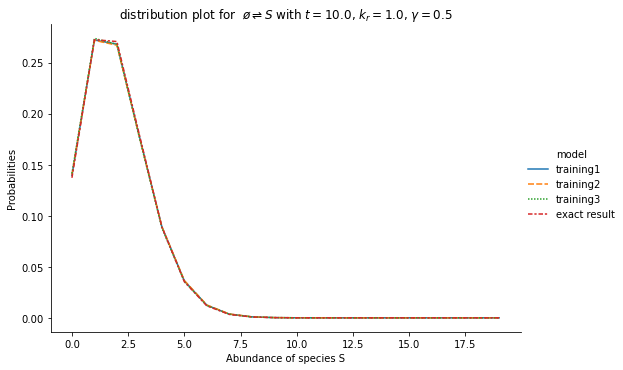

In [26]:
plot_model(torch.tensor([10., 1., 0.5]), [model1, model2, model3], up_bound = 20, save=(True, "1distribution.png"))

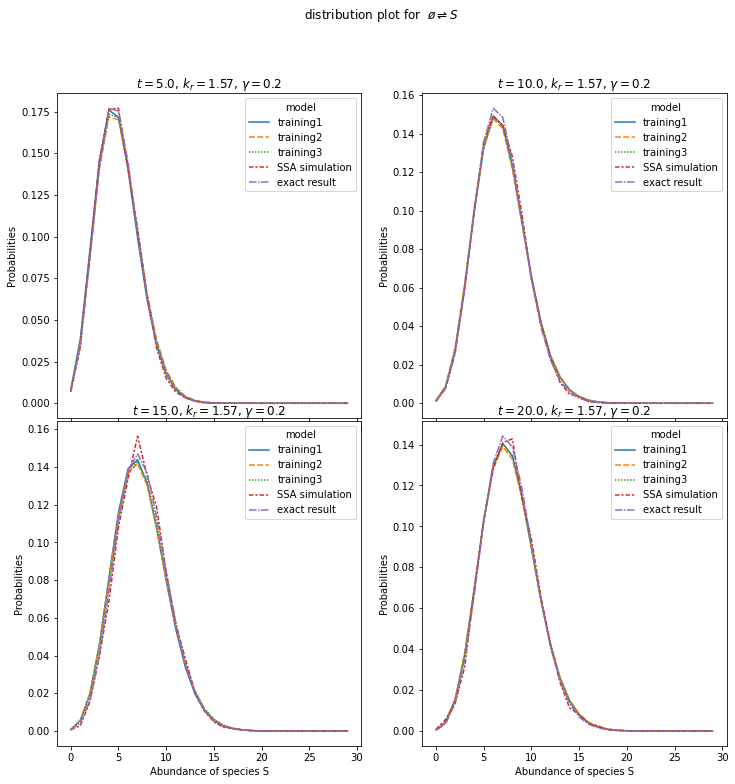

In [27]:
multiple_plots([X_test[996+k,:] for k in range(4)], 
                [model1, model2, model3], 
                up_bound = 4*[30], 
                plot_test_result = (True, [y_test[996+k,:] for k in range(4)]),
                save=(True, "4distributions.png"))

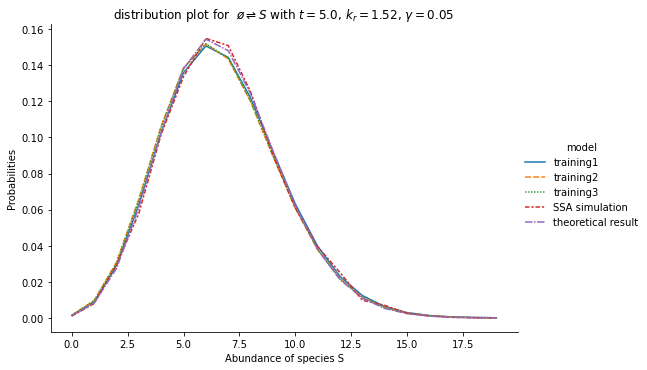

In [150]:
index = 100
plot_model(X_test[index,:], [model1, model2, model3], up_bound = 20, plot_test_result=(True, y_test[index, :]))

We can check the accuracy for higher times than those of the training:

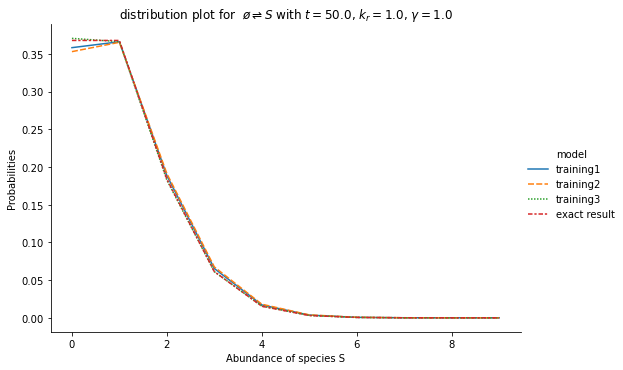

In [28]:
plot_model(torch.tensor([50., 1., 1.]), [model1, model2, model3], up_bound = 10, save=(True, "t50k1g1.png"))

We can also check the accuracy for parameters outside the bounds of the training.

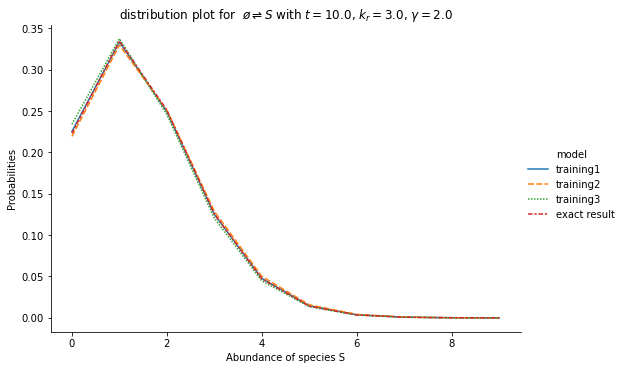

In [54]:
plot_model(torch.tensor([10., 3., 2.]), [model1, model2, model3], up_bound = 10, save=(True, "t10k3g2.png"))

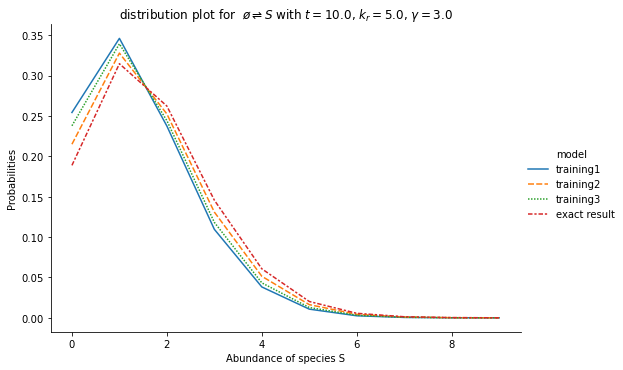

In [29]:
plot_model(torch.tensor([10., 5., 3.]), [model1, model2, model3], up_bound = 10, save=(True, "t10k5g3.png"))

## Sentivities plot

To compute sensitivities and compare them to the theoretical ones. 

### With respect to $k_r$

$$\nabla_{k_r} f(x,t,k_r, \gamma) = \frac{1-e^{-\gamma t}}{\gamma} \times e^{-\lambda} (\frac{\lambda^{x-1}}{(x-1)!} - \frac{\lambda^x}{x!})

In [10]:
def birth_death_sensitivity_kr(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    dlambd = (1-np.exp(-gamma*t))/gamma
    return dlambd * (poisson.pmf(x-1, lambd) - poisson.pmf(x, lambd))

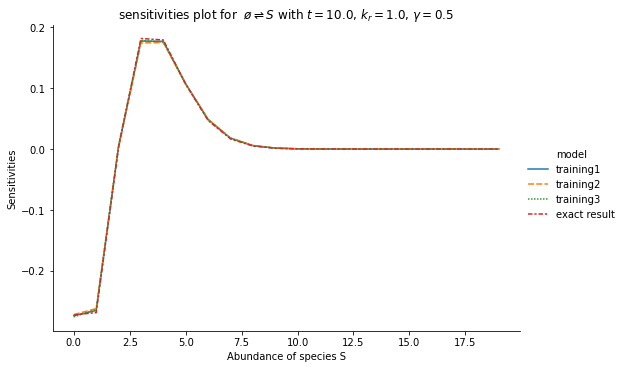

In [30]:
plot_model(torch.tensor([10., 1., 0.5]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), distribution=birth_death_sensitivity_kr, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, "sensitivities_1distr.png"))

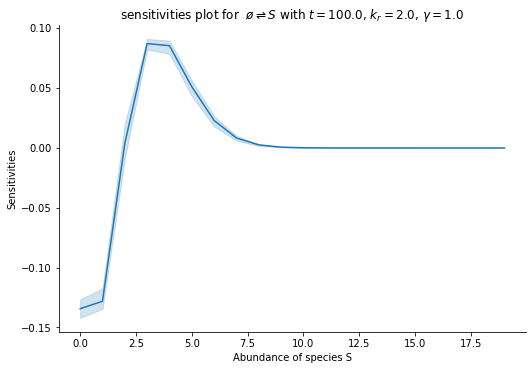

In [174]:
plot_model(torch.tensor([100., 2., 1.]), 
            [model1, model2, model3], 
            up_bound=20, 
            plot=('sensitivities', 0), 
            confidence_interval=True, 
            distribution=birth_death_sensitivity_kr, 
            index_names = ['Sensitivities', 'Abundance of species S'])

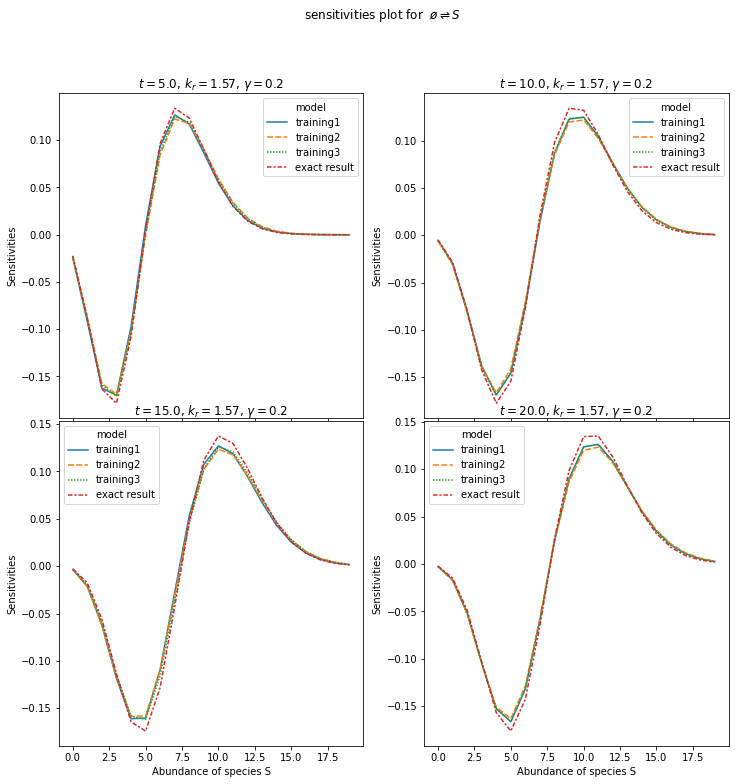

In [31]:
multiple_plots(preds=[X_test[996+k,:] for k in range(4)], 
                models=[model1, model2, model3], 
                up_bound = [20]*5, 
                plot=('sensitivities', 0), 
                distribution=birth_death_sensitivity_kr, 
                index_names = ['Sensitivities', 'Abundance of species S'],
                save=(True, 'sensitivities_kr_median.png'))

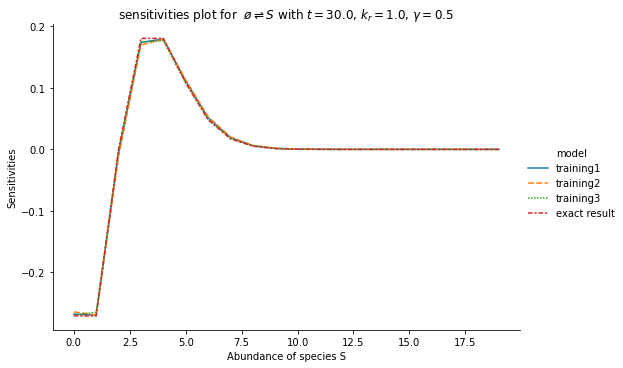

In [52]:
plot_model(torch.tensor([30., 1., 0.5]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), distribution=birth_death_sensitivity_kr, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, "sensitivities_t30k1g5.png"))

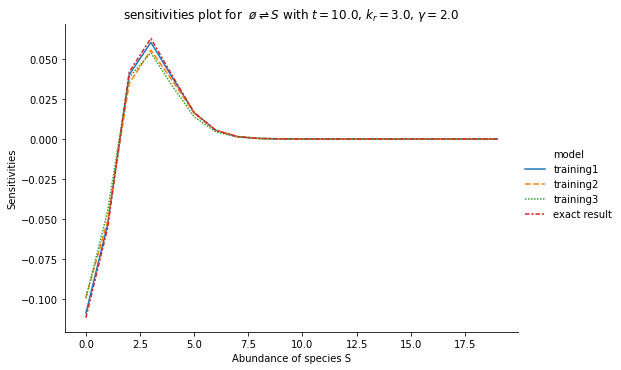

In [53]:
plot_model(torch.tensor([10., 3., 2.]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), distribution=birth_death_sensitivity_kr, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, "sensitivities_t10k3g2.png"))

### With respect to $\gamma$

\begin{align}
\nabla_\gamma f(x, t, k_r, \gamma) &= \nabla_\gamma \lambda(t, k_r, \gamma) e^{-\lambda} (\frac{\lambda^{x-1}}{(x-1)!} - \frac{\lambda^x}{x!}) \\ \text{ where } \nabla_\gamma \lambda(t, k_r, \gamma) &= \frac{k_r}{\gamma} (1- e^{-\gamma t}) (te^{-\gamma t}-\frac{1}{\gamma}) \\ &= \lambda(t, k_r, \gamma)(te^{-\gamma t}-\frac{1}{\gamma})
\end{align}

In [11]:
def birth_death_sensitivity_gamma(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    dlambd = lambd * (t*np.exp(-gamma*t) - 1/gamma)
    return dlambd * (poisson.pmf(x-1, lambd) - poisson.pmf(x, lambd))

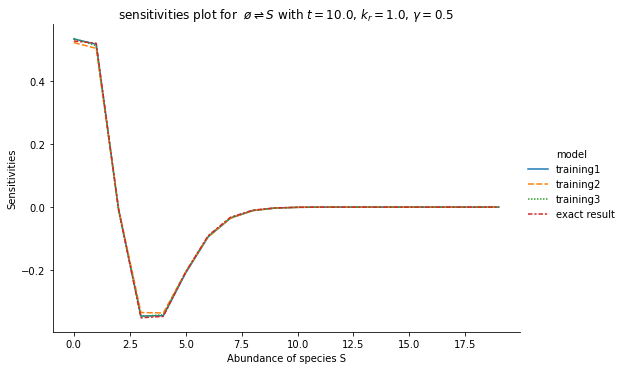

In [33]:
plot_model(torch.tensor([10., 1., 0.5]), 
                [model1, model2, model3], 
                up_bound=20, 
                plot=('sensitivities', 1), 
                distribution=birth_death_sensitivity_gamma,
                index_names = ['Sensitivities', 'Abundance of species S'],
                save=(True, "sensitivities_gamma_t10k1g5.png"))

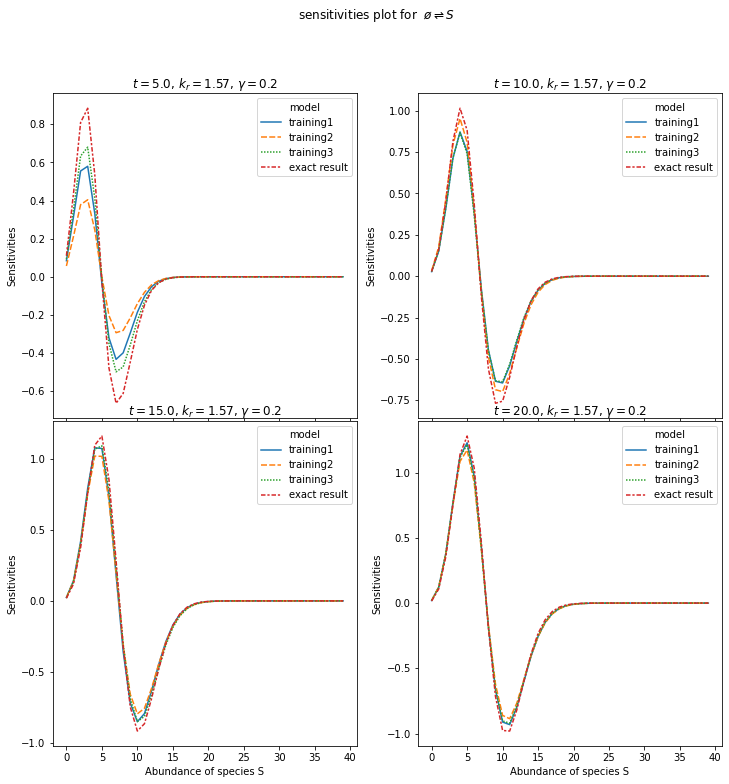

In [36]:
multiple_plots(preds=[X_test[996+k,:] for k in range(4)], 
            models=[model1, model2, model3], 
            up_bound = [40]*6, 
            plot=('sensitivities', 1), 
            distribution=birth_death_sensitivity_gamma,
            index_names = ['Sensitivities', 'Abundance of species S'],
            save=(True, "sensitivities_4distr_gamma.png"))

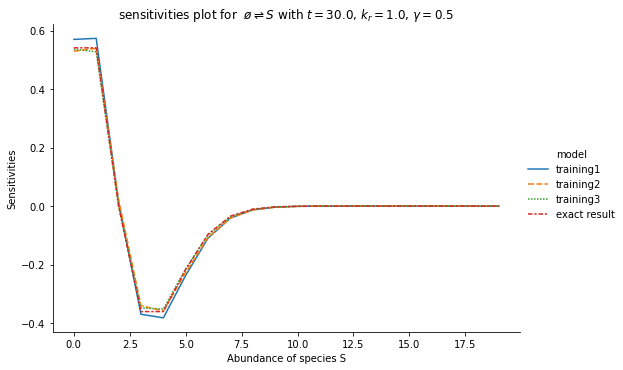

In [51]:
plot_model(torch.tensor([30., 1., 0.5]), 
                [model1, model2, model3], 
                up_bound=20, 
                plot=('sensitivities', 1), 
                distribution=birth_death_sensitivity_gamma,
                index_names = ['Sensitivities', 'Abundance of species S'],
                save=(True, "sensitivities_gamma_t30k1g5.png"))

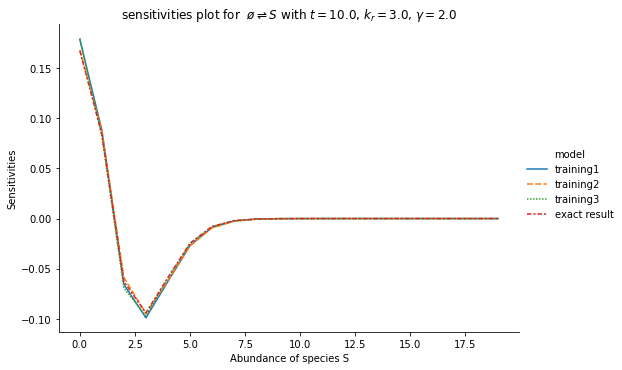

In [50]:
plot_model(torch.tensor([10., 3., 2]), 
                [model1, model2, model3], 
                up_bound=20, 
                plot=('sensitivities', 1), 
                distribution=birth_death_sensitivity_gamma,
                index_names = ['Sensitivities', 'Abundance of species S'],
                save=(True, "sensitivities_gamma_t10k3g2.png"))

## Fisher information

The exact solution for the Fisher information for Poisson fluctuations is:
$$I_{Poisson(\lambda)} = \frac{1}{\lambda}.$$

\begin{align}
p(x, k_r, \gamma ) &= \frac{(\frac{kr}{\gamma}(1-e^{-\gamma t}))^x e^{-\frac{k_r}{\gamma}(1-e^{-\gamma t})}}{x!} \\
\log p(x, k_r, \gamma) &= x (\log(k_r)-\log(\gamma) + \log(1-e^{-\gamma t}))-\frac{k_r}{\gamma}(1-e^{-\gamma t}) - \log(x!)\\
\frac{\partial}{\partial k_r} \log p(x,k_r, \gamma) &= \frac{x}{k_r} - \frac{1}{\gamma}(1-e^{-\gamma t}) \\
\frac{\partial^2}{\partial k_r^2} \log p(x, k_r, \gamma) &= -\frac{x}{k_r^2}
\end{align}

\begin{align}
-\mathbb{E}[\frac{\partial^2}{\partial k_r^2} \log p(X)]
    &=-\sum_x \frac{\partial^2}{\partial k_r^2} \log p(x, k_r, \gamma) p(x) \\
    &=- \sum_x -\frac{x}{k_r^2}\frac{(\frac{kr}{\gamma}(1-e^{-\gamma t}))^x e^{-\frac{k_r}{\gamma}(1-e^{-\gamma t})}}{x!} \\
    &= \frac{e^{-\frac{k_r}{\gamma}(1-e^{-\gamma t})}}{k_r^2} \sum_x \frac{x[\frac{k_r}{\gamma}(1-e^{-\gamma t})]^x}{x!} \\
    &= \frac{e^{-\frac{k_r}{\gamma}(1-e^{-\gamma t})}}{k_r^2}[\sum_{x \leq 1} \frac{[\frac{k_r}{\gamma}(1-e^{-\gamma t})]^{x-1}}{(x-1)!}] \times \frac{k_r}{\gamma}(1-e^{-\gamma t}) \\
    &= \frac{e^{-\frac{k_r}{\gamma}(1-e^{-\gamma t})}}{k_r^2} \times e^{\frac{k_r}{\gamma}(1-e^{-\gamma t})} \times \frac{k_r}{\gamma}(1-e^{-\gamma t}) \\
    &= \frac{\lambda}{k_r^2}


\end{align}

\begin{align*}
\frac{\partial}{\partial \gamma} \log p(x,k_r, \gamma) 
&= x[-\frac{1}{\gamma} + \frac{te^{-\gamma t}}{1-e^{-\gamma t}}]+\frac{k_r}{\gamma^2}(1-e^{-\gamma t})-\frac{k_r}{\gamma} te^{-\gamma t}\\
&= x[-\frac{1}{\gamma} + \frac{t}{e^{\gamma t}-1}]+\frac{k_r}{\gamma^2}(1-e^{-\gamma t})-\frac{k_r}{\gamma} te^{-\gamma t}
\end{align*}

\begin{align*}
\frac{\partial^2}{\partial \gamma^2} \log p(x,k_r, \gamma) 
    &=\frac{x}{\gamma^2} + xt \frac{te^{\gamma t}}{(e^{\gamma t} - 1)^2} -2\frac{k_r}{\gamma^3}(1-e^{-\gamma t}) + \frac{k_r}{\gamma^2}\times te^{-\gamma t} + \frac{k_r}{\gamma^2} te^{-\gamma t} + \frac{k_r}{\gamma}t^2 e^{-\gamma t}\\
    &=\frac{x}{\gamma^2} + xt \frac{te^{\gamma t}}{(e^{\gamma t} - 1)^2} -2\frac{k_r}{\gamma^3}(1-e^{-\gamma t}) + 2\frac{k_r}{\gamma^2}\times te^{-\gamma t} + \frac{k_r}{\gamma}t^2 e^{-\gamma t}    
\end{align*}

\begin{align*}
\mathbb{E}[\frac{\partial^2}{\partial \gamma^2} \log p(X,k_r, \gamma)]
    &= \sum_x \frac{\partial^2}{\partial \gamma^2} \log p(x,k_r, \gamma) p(x, k_r, \gamma)\\
    &= \sum_x [\frac{x}{\gamma^2} + xt \frac{te^{\gamma t}}{(e^{\gamma t} - 1)^2} -2\frac{\lambda}{\gamma^2} + 2\frac{k_r}{\gamma^2}\times te^{-\gamma t} + \frac{k_r}{\gamma}t^2 e^{-\gamma t}] \times \frac{\lambda^x e^{-\lambda}}{x!} \\
\end{align*}

\begin{align}
Var[\frac{\partial}{\partial \gamma} \log p] 
    &= [\frac{-1}{\gamma} + \frac{t}{e^{\gamma t}-1}]^2 \lambda
\end{align}

In [12]:
def exact_fim_kr(t, params):
    kr, gamma = params[0], params[1]
    lambd = -kr/gamma*(1-np.exp(-gamma*t))
    return -lambd/kr**2

In [13]:
def exact_fim_gamma(t, params):
    kr, gamma = params[0], params[1]
    lambd = -kr/gamma*(1-np.exp(-gamma*t))
    return - lambd*(-1/gamma + t/(np.exp(gamma*t)-1))**2

In [8]:
def fim(inputs, model, up_bound):
    fims = []
    for to_pred in inputs:
        x = torch.arange(up_bound).repeat(1, N_COMPS,1).permute([2,0,1])
        y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
        sens = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, 1:]
        fim = ode.fisher_information_t(y_pred.detach().numpy(), sens.detach().numpy())
        fims.append(fim)
    return fims


In [17]:
def fi_table_multiple(time_samples, 
            params, 
            ind_param, 
            models = (False, None, 3),
            exact: Tuple[bool, Callable] =(False, None), 
            fsp = (False, np.zeros(1), [], 10, None),
            up_bound = 100):
    rows = [fr'$t={t}$' for t in time_samples]
    n_rows = len(time_samples)
    # compute probabilities and sensitivities with the neural networks
    if models[0]:
        probabilities_m = np.zeros((len(time_samples),up_bound))
        stv_m = np.zeros((len(time_samples),up_bound, len(params)))
        x = torch.arange(up_bound).repeat(1, models[2],1).permute([2,0,1])
        for model in models[1]:
            for i, t in enumerate(time_samples):
                to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))
                sens, probs = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound, with_probs=True)
                probabilities_m[i,:] += probs[:,0].numpy()
                stv_m[i,:,:] += sens[:,1:].numpy()
        probabilities_m /= len(models[1])
        stv_m /= len(models[1])
        # compute FIM
        predicted_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim_m = ode.fisher_information_t(probabilities_m[i,:], stv_m[i,:,:])
            predicted_fi[i] = fim_m[ind_param, ind_param]
    # compute probabilities and sensitivities with the FSP
    if fsp[0]:
        crn = simulation.CRN(fsp[1], fsp[2], len(params))
        stv_calculator = ode.SensitivitiesDerivation(crn, fsp[3])
        if fsp[4]:
            init_state = fsp[4]
        else:
            init_state = np.zeros(2*(fsp[3]+1))
            init_state[1] = 1
            init_state = np.stack([init_state]*crn.n_reactions)
        probs_fsp, stv_fsp = stv_calculator.get_sensitivities(init_state, 0, time_samples[-1], params.numpy(), t_eval=time_samples)
        fsp_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim = ode.fisher_information_t(probs_fsp[i,:], stv_fsp[i,:,:])
            fsp_fi[i] = fim[ind_param, ind_param]
    # add condition for models and fsp
    columns = []
    data = []
    # gathering data
    if models[0]:
        columns.append('Predicted with NN')
        data.append(np.round(predicted_fi,3))
    if fsp[0]:
        columns.append('Estimated with FSP')
        data.append(np.round(fsp_fi, 3))
    if exact[0]:
        columns.append('Exact')
        exact_fi = np.zeros(n_rows)
        for i, t in enumerate(time_samples):
            exact_fi[i] = exact[1](t, params)
        data.append(np.round(exact_fi,3))
    if len(data)==1:
        data = np.array(data).T
    else:
        data = np.stack(data, axis=-1)
    #plot
    fig, ax = plt.subplots(figsize=(8,3))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = plt.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colWidths=[1.]*len(columns))
    table.set_fontsize(14)
    table.scale(0.4,1.6)
    plt.subplots_adjust(left=0.2, bottom=0.2)
    fig.suptitle(f'Fisher Information - parameter n°{ind_param} - parameter values {params}')
    plt.show()

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_64936/574762795.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


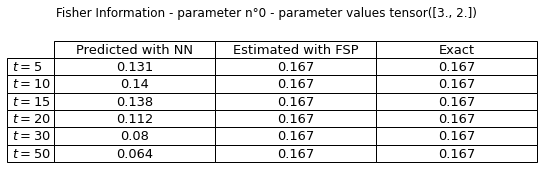

In [18]:
fi_table_multiple([5, 10, 15, 20, 30, 50], 
                params=torch.tensor([3., 2.]), 
                ind_param=0,
                models = (True, [model1, model2, model3], N_COMPS), 
                exact=(True, exact_fim_kr),
                fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1, propensities.lambda2]), 50, None)) 

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_64936/574762795.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))
/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_64936/3623697817.py:4: RuntimeWarning: overflow encountered in exp
  return - lambd*(-1/gamma + t/(np.exp(gamma*t)-1))**2


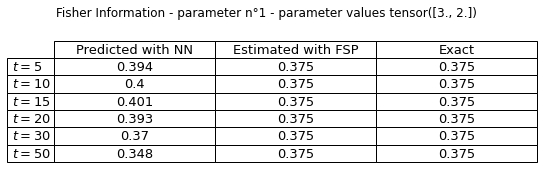

In [19]:
fi_table_multiple([5, 10, 15, 20, 30, 50], 
                params=torch.tensor([3., 2.]), 
                ind_param=1, 
                models = (True, [model1, model2, model3], N_COMPS), 
                exact=(True, exact_fim_gamma),
                fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1, propensities.lambda2]), 50, None)) 

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_64936/574762795.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


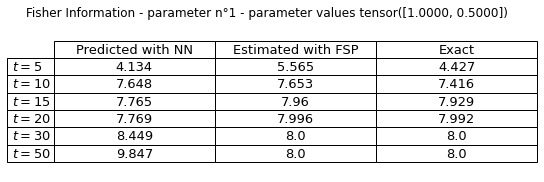

In [20]:
fi_table_multiple([5, 10, 15, 20, 30, 50], 
                    torch.tensor([1., 0.5]), 
                    ind_param=1, 
                    models = (True, [model1, model2, model3], N_COMPS), 
                    exact=(True, exact_fim_gamma),
                    fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1, propensities.lambda2]), 50, None)) 

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_64936/574762795.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


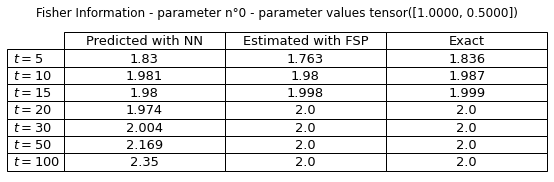

In [24]:
fi_table_multiple([5, 10, 15, 20, 30, 50], 
                    torch.tensor([1., 0.5]), 
                    ind_param=0, 
                    models = (True, [model1, model2, model3], N_COMPS), 
                    exact=(True, exact_fim_kr),
                    fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1, propensities.lambda2]), 50, None)) 